<a href="https://colab.research.google.com/github/hamagami/ad2025/blob/main/%E7%AE%B1%E3%81%B2%E3%81%92%E5%9B%B3%E3%81%A8IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 箱ひげ図とIQRを用いた簡易異常検知

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# ===== Parameters =====
K = 1.5          # IQR multiplier (1.5 typical, 3.0 for "far out")
N = 500          # sample size
LOC = 5.0        # mean of the generating normal
SCALE = 2.0      # std of the generating normal
SEED = 0         # RNG seed for reproducibility
INJECT_DEMO_OUTLIERS = True  # set False to disable injected extreme values


In [5]:
#データの生成
rng = np.random.default_rng(SEED)
x = rng.normal(loc=LOC, scale=SCALE, size=N)

# (optional) inject a few extreme values for demonstration
if INJECT_DEMO_OUTLIERS and N >= 8:
    x[:5] = x[:5] + np.array([10, -9, 12, -8, 15])  # big highs/lows
    x[5:8] = x[5:8] + np.array([7, -7, 9])

In [6]:
# IQRと　閾値の計算
q1, q3 = np.percentile(x, [25, 75])
iqr = q3 - q1
lower_fence = q1 - K * iqr
upper_fence = q3 + K * iqr

outlier_mask = (x < lower_fence) | (x > upper_fence)
idx = np.arange(len(x))

/tmp/ipython-input-186849131.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x, vert=False, showmeans=True, labels=["Data"])


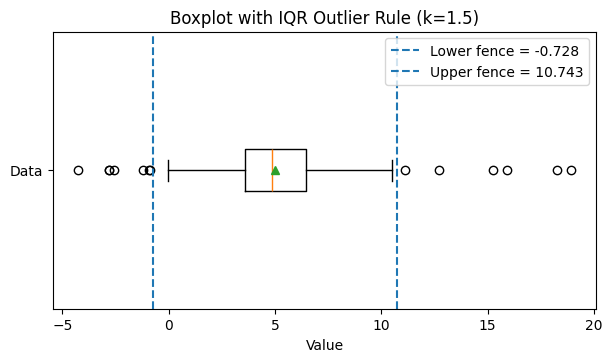

In [7]:
# 箱ひげ図の描画
plt.figure(figsize=(7, 3.6))
plt.boxplot(x, vert=False, showmeans=True, labels=["Data"])
plt.axvline(lower_fence, linestyle="--", label=f"Lower fence = {lower_fence:.3f}")
plt.axvline(upper_fence, linestyle="--", label=f"Upper fence = {upper_fence:.3f}")
plt.title(f"Boxplot with IQR Outlier Rule (k={K})")
plt.xlabel("Value")
plt.legend(loc="best")
plt.show()

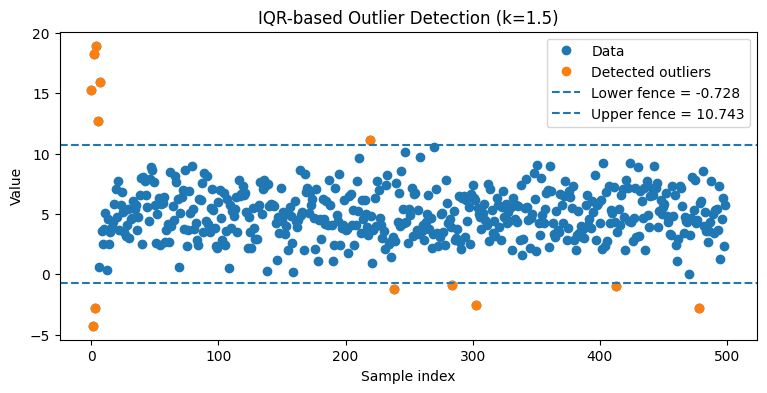

In [8]:
# 外れ値の描画
plt.figure(figsize=(9, 4))
plt.plot(idx, x, marker="o", linestyle="none", label="Data")
plt.plot(idx[outlier_mask], x[outlier_mask], marker="o", linestyle="none",
         label="Detected outliers")
plt.axhline(lower_fence, linestyle="--", label=f"Lower fence = {lower_fence:.3f}")
plt.axhline(upper_fence, linestyle="--", label=f"Upper fence = {upper_fence:.3f}")
plt.title(f"IQR-based Outlier Detection (k={K})")
plt.xlabel("Sample index")
plt.ylabel("Value")
plt.legend(loc="best")
plt.show()